In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt; plt.rc('font', size=12)
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.cm as cm
from mlxtend.evaluate import permutation_test

In [2]:
pretty_names_dir = {'B_caccae': '$B. caccae$',
                'B_cellulosilyticus_WH2': '$B. cellulosilyticus$ WH2',
                'B_ovatus': '$B. ovatus$',
                'B_thetaiotaomicron': '$B. thetaiotaomicron$',
                'B_uniformis': '$B. uniformis$',
                'B_vulgatus': '$B. vulgatus$',
                'C_aerofaciens': '$C. aerofaciens$',
                'C_scindens': '$C. scindens$',
                'C_spiroforme': '$C. spiroforme$',
                # 'D_longicatena': '$D. longicatena$',
                'P_distasonis': '$P. distasonis$',
                'R_obeum': '$R. obeum$'
                }

order = ['B_cellulosilyticus_WH2', 
        'B_caccae', 
        'B_vulgatus', 
        'B_thetaiotaomicron', 
        'B_ovatus', 
        'R_obeum', 
        'B_uniformis', 
        'P_distasonis', 
        'C_scindens', 
        'C_aerofaciens', 
        'C_spiroforme', 
        # 'D_longicatena'
        ]

abbr_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob'
                }

pretty_abbrv_dir = {pretty_names_dir[organism]:abbr_names_dir[organism] for organism in order}

order_pretty = [pretty_names_dir[organism] for organism in order]

In [3]:
def evidence(x):
    if x < np.sqrt(10):
        return 'Weak'
    elif x < 10:
        return 'Moderate'
    elif x < 100:
        return 'Strong'
    else:
        return 'Very strong'

In [4]:
nodes_lf0 = pd.read_table('mcnulty-results/mcnulty-LF0-seed96/posteriors/nodes.tsv', index_col=0)
nodes_lf0['Perturbation_evidence'] = nodes_lf0['Perturbation_bayes_factor'].apply(evidence)
nodes_lf0['Perturbation_evidence'] = pd.Categorical(nodes_lf0['Perturbation_evidence'], categories=['Weak', 'Moderate', 'Strong', 'Very strong'], ordered=True)
nodes_lf0['Self_interaction_mag_log'] = np.log10(nodes_lf0['Self_interaction_mean'])
nodes_lf0 = nodes_lf0.loc[:, ['Growth_mean', 'Perturbation_median', 'Perturbation_evidence', 'Self_interaction_mean', 'Self_interaction_mag_log']].copy()
nodes_lf0.index = nodes_lf0.index.map(pretty_names_dir)
nodes_lf0

,Growth_mean,Perturbation_median,Perturbation_evidence,Self_interaction_mean,Self_interaction_mag_log
name,,,,,
$B. caccae$,0.569479,0.000000,Weak,5.246690e-09,-8.280115
$B. cellulosilyticus$ WH2,0.853725,-0.756402,Very strong,1.308792e-09,-8.883129
$B. ovatus$,1.118344,-1.009152,Very strong,2.174034e-08,-7.662734
$B. thetaiotaomicron$,0.743042,0.000000,Weak,1.543510e-08,-7.811491
$B. uniformis$,0.448401,0.000000,Weak,1.850696e-08,-7.732665
$B. vulgatus$,0.357769,0.000000,Weak,4.814881e-09,-8.317414
$C. aerofaciens$,0.934979,-0.377038,Weak,3.267303e-07,-6.485811
$C. scindens$,0.657119,0.000000,Weak,8.764350e-08,-7.057280
$C. spiroforme$,0.728949,0.000000,Weak,8.752038e-07,-6.057891


In [5]:
nodes_hf0 = pd.read_table('mcnulty-results/mcnulty-HF0-seed12/posteriors/nodes.tsv', index_col=0)
nodes_hf0['Perturbation_evidence'] = nodes_hf0['Perturbation_bayes_factor'].apply(evidence)
nodes_hf0['Perturbation_evidence'] = pd.Categorical(nodes_hf0['Perturbation_evidence'], categories=['Weak', 'Moderate', 'Strong', 'Very strong'], ordered=True)
nodes_hf0['Self_interaction_mag_log'] = np.log10(nodes_hf0['Self_interaction_mean'])
nodes_hf0 = nodes_hf0.loc[:, ['Growth_mean', 'Perturbation_median', 'Perturbation_evidence', 'Self_interaction_mean', 'Self_interaction_mag_log']].copy()
nodes_hf0['Perturbation_median'] = -nodes_hf0['Perturbation_median']
nodes_hf0.index = nodes_hf0.index.map(pretty_names_dir)
nodes_hf0

,Growth_mean,Perturbation_median,Perturbation_evidence,Self_interaction_mean,Self_interaction_mag_log
name,,,,,
$B. caccae$,0.747416,-0.372826,Moderate,1.110496e-08,-7.954483
$B. cellulosilyticus$ WH2,0.192382,1.635256,Strong,3.195156e-09,-8.495508
$B. ovatus$,0.084154,14.891756,Very strong,1.095874e-08,-7.960239
$B. thetaiotaomicron$,0.380147,0.000000,Weak,8.582218e-09,-8.066400
$B. uniformis$,0.213863,1.349696,Moderate,1.863072e-08,-7.729770
$B. vulgatus$,0.346366,0.000000,Weak,4.146426e-09,-8.382326
$C. aerofaciens$,0.259240,0.000000,Weak,2.369496e-07,-6.625344
$C. scindens$,0.483459,0.000000,Weak,7.149968e-08,-7.145696
$C. spiroforme$,0.607797,-0.575015,Weak,1.082157e-06,-5.965710


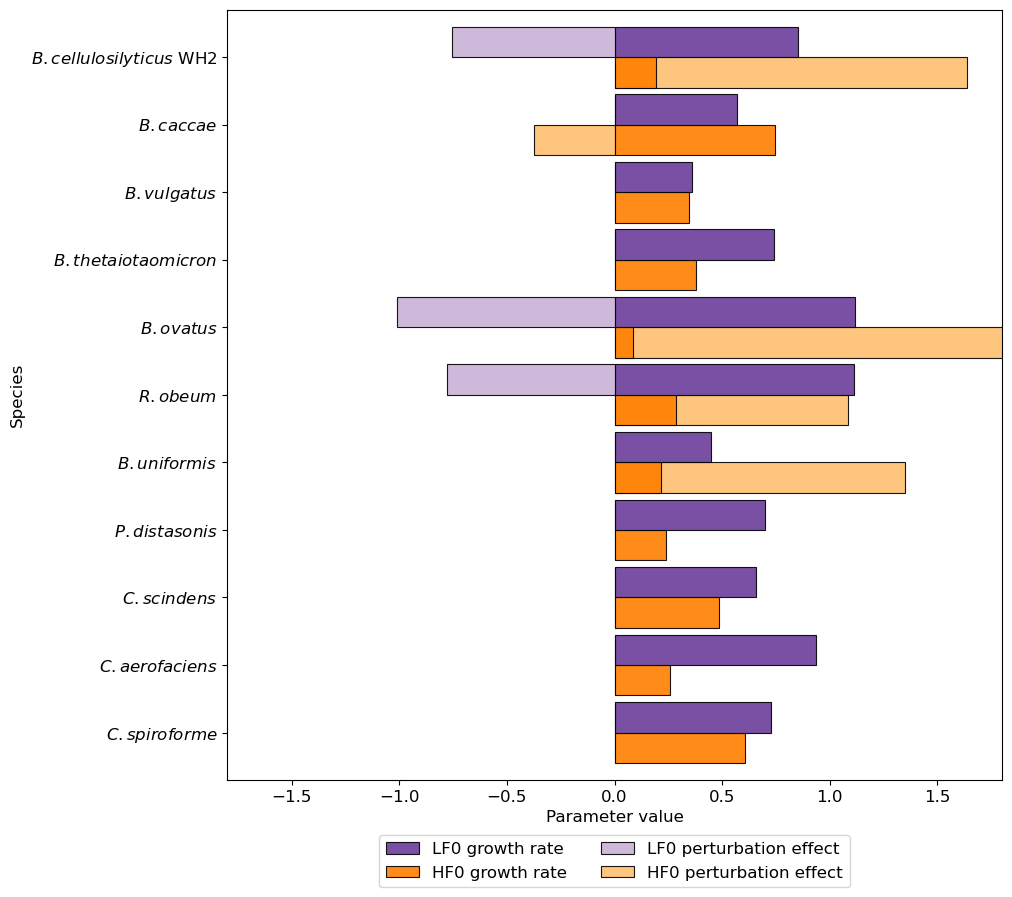

In [6]:
growth_lf0 = nodes_lf0.loc[:, ['Growth_mean']].copy()
growth_lf0.columns  = ['LF0 growth rate']
growth_lf0 = growth_lf0.loc[order_pretty[::-1], :]
pert_lf0 = nodes_lf0.loc[:, ['Perturbation_median']].copy()
pert_lf0.columns  = ['LF0 perturbation effect']
pert_lf0['LF0 perturbation effect'] = [0 if nodes_lf0['Perturbation_evidence'][i] == 'Weak' else pert_lf0['LF0 perturbation effect'][i] for i in pert_lf0.index]
pert_lf0 = pert_lf0.loc[order_pretty[::-1], :]

growth_hf0 = nodes_hf0.loc[:, ['Growth_mean']].copy()
growth_hf0.columns  = ['HF0 growth rate']
growth_hf0 = growth_hf0.loc[order_pretty[::-1], :]
pert_hf0 = nodes_hf0.loc[:, ['Perturbation_median']].copy()
pert_hf0.columns  = ['HF0 perturbation effect']
pert_hf0['HF0 perturbation effect'] = [0 if nodes_hf0['Perturbation_evidence'][i] == 'Weak' else pert_hf0['HF0 perturbation effect'][i] for i in pert_hf0.index]
pert_hf0 = pert_hf0.loc[order_pretty[::-1], :]

growth = pd.concat([growth_hf0, growth_lf0], axis=1)
pert = pd.concat([pert_hf0, pert_lf0], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pert.plot.barh(rot=0, 
    width=0.9, 
    figsize=(10, 10), 
    color=[cm.Paired(6), cm.Paired(8)],
    edgecolor='k', 
    linewidth=0.8, 
    xlim=(-1.8, 1.8),
    legend=False,
    hatch='',
    alpha=0.9,
    ax=ax)
growth.plot.barh(rot=0, 
    width=0.9, 
    figsize=(10, 10), 
    color=[cm.Paired(7), cm.Paired(9)],
    edgecolor='k', 
    linewidth=0.8, 
    legend=False,
    hatch='',
    alpha=0.9,
    ax=ax)
ax.set_xlabel('Parameter value')
ax.set_ylabel('Species')
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig('mcnulty-results/parameter_values.pdf', bbox_inches='tight')
plt.show()

In [44]:
self_int_lf0 = nodes_lf0['Self_interaction_mag_log'].values
self_int_hf0 = nodes_hf0['Self_interaction_mag_log'].values
p_value_self_int = permutation_test(self_int_lf0, self_int_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_self_int)

P value: 0.486


In [30]:
growth_lf0 = nodes_lf0['Growth_mean'].values
growth_hf0 = nodes_hf0['Growth_mean'].values
p_value_growth = permutation_test(growth_lf0, growth_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_growth)

P value: 0.006


In [43]:
pert_lf0 = nodes_lf0['Perturbation_median'].values
pert_lf0 = np.array([0 if nodes_lf0['Perturbation_evidence'][i] == 'Weak' else pert_lf0[i] for i in range(len(pert_lf0))])
pert_hf0 = nodes_hf0['Perturbation_median'].values
pert_hf0 = np.array([0 if nodes_hf0['Perturbation_evidence'][i] == 'Weak' else pert_hf0[i] for i in range(len(pert_hf0))])

P value: 0.128


In [46]:
pert_lf0 = nodes_lf0['Perturbation_median'].values
pert_lf0 = np.array([0 if nodes_lf0['Perturbation_evidence'][i] == 'Weak' else pert_lf0[i] for i in range(len(pert_lf0))])
pert_hf0 = nodes_hf0['Perturbation_median'].values
pert_hf0 = np.array([0 if nodes_hf0['Perturbation_evidence'][i] == 'Weak' else pert_hf0[i] for i in range(len(pert_hf0))])

growth_pert_lf0 = (1 + pert_lf0) * growth_lf0
growth_pert_hf0 = (1 + pert_hf0) * growth_hf0

p_value_growth_pert_hf = permutation_test(growth_pert_lf0, growth_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
p_value_growth_pert_lf = permutation_test(growth_lf0, growth_pert_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_growth_pert_hf)
print('P value: %.3f' % p_value_growth_pert_lf)

P value: 0.067
P value: 0.019
